## Importing required libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## For $\kappa$ vs length, used converged reservoir thickness.

In [2]:
rt1= 20             #Reservoir_thickness
z= 3.35*(10**(-10)) #Interlayer spacing

## Defining functions to read LAMMPS output files
#### .langevin file

In [3]:
def Readfile(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    T =[]
    for i in range(4,len(lines)-1):
        t= lines[i]
        T.append(t)
    Temp=[]
    Pos=[]
    for j in range(len(T)):
        p=float(T[j][1])
        q=float(T[j][3])
        Pos.append(p)
        Temp.append(q)
    return Pos, Temp

#### .dat files

In [4]:
def values(filename):
    a = open(filename, 'r')
    text = a.readlines()

    lines=[]
    for line in text:
        b = line.split()
        lines.append(b)
    
    
    Val =[]
    
    for i in range(len(lines)):
        q= float(lines[i][0])
        Val.append(q)    
    return Val

## Converting to required units

In [5]:
Lx = np.array(values("length_x.dat"))*(10**(-10))
Ly = np.array(values("length_y.dat"))*(10**(-10))
Area = z* Ly
time = np.array(values("time_val.dat"))*(10**(-12))
Qin=np.array(values("heat_in_val.dat"))*(1.6022*10**(-19))
Qout=np.array(values("heat_out_val.dat"))*(1.6022*10**(-19))

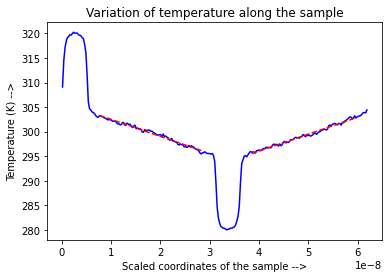

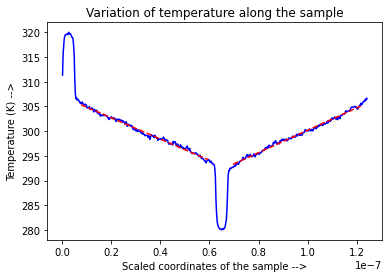

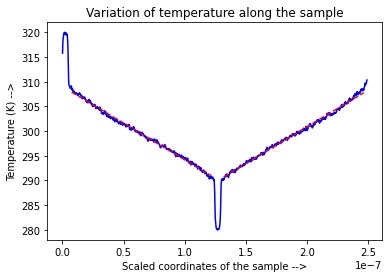

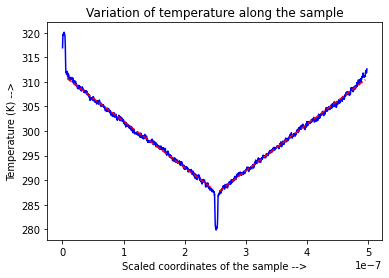

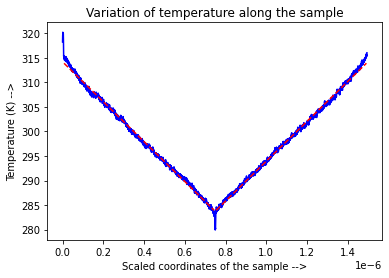

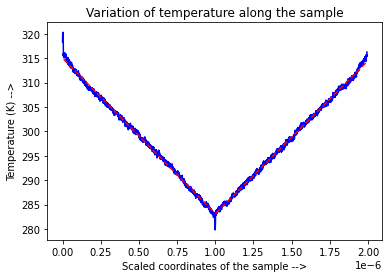

In [6]:
U=[250,500,1000,2000,6000,8000] #Repeating unit cells in direction of heat flow.

slope =[]
L=[]

for i in range(len(U)):
    
    u=U[i]
    [X,T]= Readfile("profile.%d.4.20.langevin" %u)
    X=(Lx[i])*np.array(X)
    l=(Lx[i]/2)
    
    
    T=np.array(T)
    a = int(rt1 + 10)
    b = int((len(X)/2) -10)
    c = int((len(X)/2)+rt1+10)
    d = int(len(X)-10)
    
    X1=X[a:b]
    T1=T[a:b]
    X2=X[c:d]
    T2=T[c:d]
    
    lf1 = np.polyfit(X1, T1, 1)
    lf2 = np.polyfit(X2, T2, 1)
    line1 = lf1[1]+lf1[0]*X1
    line2 = lf2[1]+lf2[0]*X2
    
    plt.figure(i)
    plt.plot(X,T, "b")
    plt.plot(X1, line1, '--r')
    plt.plot(X2, line2, '--r')
    plt.xlabel("Scaled coordinates of the sample -->")
    plt.ylabel("Temperature (K) -->")
    plt.title("Variation of temperature along the sample")
    plt.show()
    
    
    s = (abs(lf1[0])+abs(lf2[0]))*0.5
    slope.append(s)
    L.append(l)

In [7]:
slope = np.array(slope)
L1= (10**9)* np.array(L)

In [8]:
k_gra=[]
for j in range(len(slope)):
    k = (0.25 *(abs(Qin[j])+Qout[j]))/((Area[j])*(time[j])*(slope[j]))
    k_gra.append(k)

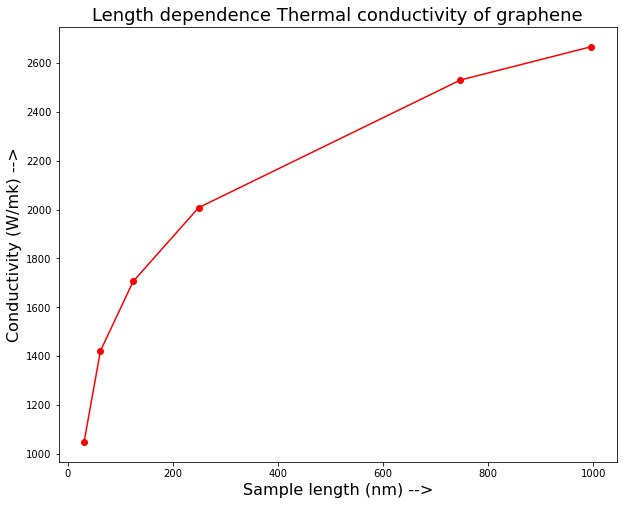

In [12]:
plt.figure(figsize=(10,8))
plt.plot(L1,k_gra, "r-o")
plt.xlabel("Sample length (nm) -->",fontsize=16)
plt.ylabel("Conductivity (W/mk) -->",fontsize=16)
plt.title('Length dependence Thermal conductivity of graphene',fontsize=18)
plt.savefig("x.jpg",dpi=150)
plt.show()